In [245]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [246]:
from IPython.display import HTML

In [247]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [248]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')

In [249]:
# Change this depending on computer used for analysis
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [250]:
print 'Pandas version ' + pd.__version__

Pandas version 0.16.2


In [251]:
filenames = glob.glob('Nline_*.mat')
#print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
#data_dict.keys()

In [252]:
sub_ex = data_dict.keys()[-1]

In [253]:
#data_dict['s_00011']['p']

In [254]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [255]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
#data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
#len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

In [256]:
#data_dict[sub_ex]['p'].dtype.names

In [257]:
#Comment this out for include all subjects
#data_dict.pop('s_02012')
#data_dict.pop('s_02001')
#data_dict.pop('s_02002')
#data_dict.pop('s_02019')
#data_dict.pop('s_02017')
del data_dict['s_02012']
del data_dict['s_02017']
del data_dict['s_02019']
del data_dict['s_02001']
del data_dict['s_02002']

In [258]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [259]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [260]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [261]:
#new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

In [262]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [263]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [264]:
#indexes[90]

In [265]:
#indexes[1][1]

In [266]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()

In [267]:
#len(indexes)

In [268]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [269]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
#sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

In [270]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [271]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [272]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test.iloc[i] = np.ravel(test[i])
    test.iloc[i] = test[i][0]
nline_df['Probe'] = test
#nline_df['Probe']

### Create Stim Labels

In [273]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

Data Column Names

In [274]:
nline_df.columns

Index([           u'BadPress',               u'Block',               u'Click',
                   u'Correct',               u'Error',           u'ITI_onset',
            u'ITI_onset_real',            u'Line_pct',          u'MouseTrack',
                      u'Move',              u'Points',               u'Probe',
                        u'RT',              u'RTHold',            u'Response',
                      u'Slow',                u'Task',               u'TestX',
                     u'Trial',               u'Wrong',               u'catch',
               u'catch_probe',      u'consider_onset', u'consider_onset_real',
              u'decision_end',   u'decision_end_real',      u'decision_onset',
       u'decision_onset_real',                u'hold',          u'hold_onset',
           u'hold_onset_real',                 u'iti',           u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [275]:
#nline_df['catch'].sum()

In [276]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [277]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [278]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
nline_missed = nline_no_miss['Missed']
#nline_missed

In [279]:
nline_no_miss = nline_no_miss[nline_no_miss['Error']<1]
nline_no_miss['AbsError'] = np.abs(nline_no_miss['Error'])
#nline_no_miss

## How many trials missed?

In [280]:
nline_missed_subj = nline_missed.groupby(level=0)
nline_missed_subj.sum()

Subject
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02009     1
s_02010     7
s_02011     7
s_02014     7
s_02015     6
s_02016    10
s_02018     4
s_02020    12
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

In [281]:
missed = nline_missed_subj.sum()

##Subject Averages

In [282]:
nline_no_miss_subj = nline_no_miss.groupby(level=0)
nline_no_miss_subj.mean()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,0.002544,2.240014,0.480898,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,0.034298
s_02011,0.005220,2.177101,0.512704,0,0.031181
s_02014,0.000828,2.200079,0.485166,0,0.033909


##Overall Averages

In [283]:
np.mean(nline_no_miss_subj.mean())

Error      -0.001894
RT          2.155551
RTHold      0.475796
Missed      0.000000
AbsError    0.026046
dtype: float64

In [284]:
##Subject Standard Deviations (title for markdown deleted)
#nline_no_miss_subj.std()

In [285]:
##Overall Standard Deviation (deleted from markdown)
#np.mean(nline_no_miss_subj.std())

##How many trials did they actually respond?

In [286]:
nline_no_miss_subj['RT'].count()

Subject
s_02003    137
s_02004    141
s_02005    127
s_02006    142
s_02007    143
s_02009    143
s_02010    137
s_02011    137
s_02014    137
s_02015    138
s_02016    134
s_02018    140
s_02020    132
s_02021    139
s_02022    126
s_02023    139
s_02024    134
s_02027    138
Name: RT, dtype: int64

# RT Histograms

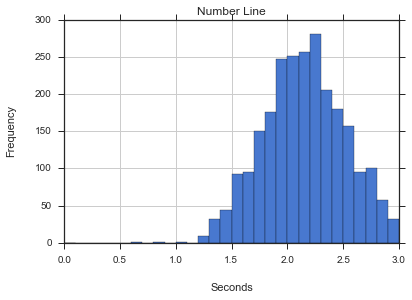

In [287]:
#pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,300])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## RTHold missed analysis

In [410]:
nline_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_miss = nline_miss[nline_miss['catch']<1]
#len(nline_miss)

In [411]:
nline_miss.loc[:,'Missed'] = nline_miss['Error']
nline_miss.loc[nline_miss['Missed']<1,'Missed'] = 0

#['Missed'][nline_miss['Missed']<1] = 0
#nline_miss

In [412]:
nline_miss['AbsError'] = np.abs(nline_miss['Error'])

In [413]:
position_missed = nline_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [414]:
responded = nline_miss[nline_miss['Missed']==0]
#responded['Error'] = np.abs(responded['Error'])
#len(responded)

In [415]:
nline_miss = nline_miss[nline_miss['Missed']==1]
#nline_miss

## Missed by position (across subjects)

In [416]:
position_missed.sum()

Task  Line_pct
1     0.03        5
      0.07        5
      0.11        5
      0.21        4
      0.28        3
      0.33        3
      0.36        3
      0.45        1
      0.57        3
      0.60        0
      0.65        0
      0.74        4
      0.77        1
      0.85        5
      0.90        4
      0.98        1
2     0.03        6
      0.07        4
      0.11        2
      0.21        2
      0.28        2
      0.33        1
      0.36        1
      0.45        1
      0.57        0
      0.60        0
      0.65        0
      0.74        3
      0.77        0
      0.85        5
      0.90        0
      0.98        6
3     0.03        4
      0.07        5
      0.11        3
      0.21        1
      0.28        2
      0.33        2
      0.36        2
      0.45        2
      0.57        2
      0.60        3
      0.65        2
      0.74        4
      0.77        1
      0.85        3
      0.90        5
      0.98        7
Name: Missed, dtype: floa

In [417]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

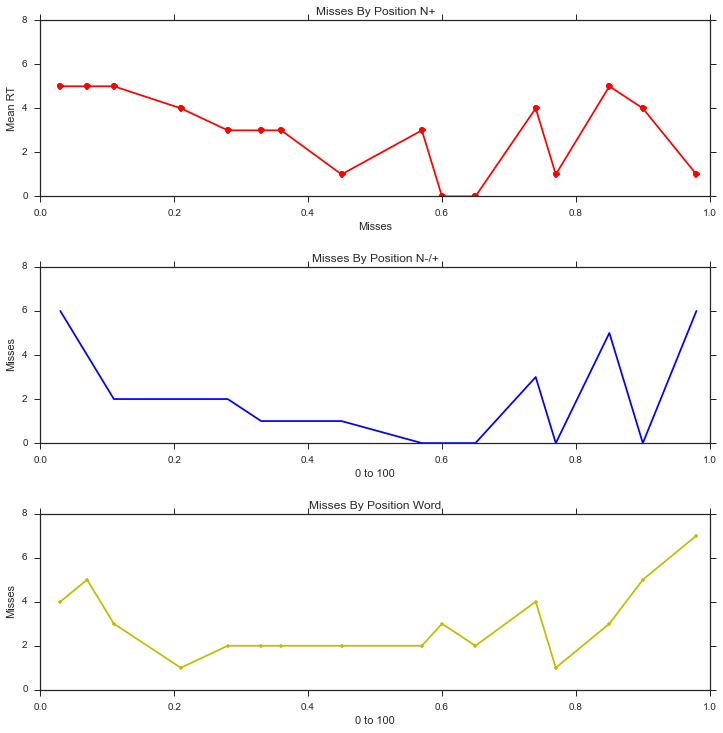

In [418]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'ro-')
plt.title('Misses By Position N+')
plt.xlabel('Misses', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, 'b+-')
plt.title('Misses By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, 'y.-')
plt.title('Misses By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))

plt.subplots_adjust(hspace=.4)

##RTHold Subject Average

In [419]:
nline_miss_subj = nline_miss.groupby(level=0)
nline_miss_subj['RTHold'].mean()

Subject
s_02003    0.580029
s_02004    0.371789
s_02005    0.523442
s_02006    0.318201
s_02007    0.446265
s_02009    0.596069
s_02010    0.617966
s_02011    0.586275
s_02014    0.439934
s_02015    0.620800
s_02016    0.969234
s_02018    0.409631
s_02020    0.697097
s_02021    0.455508
s_02022    0.981399
s_02023    1.329770
s_02024    0.595365
s_02027    0.886305
Name: RTHold, dtype: float64

##RTHold Overall Average

In [420]:
np.mean(nline_miss_subj['RTHold'].mean())

0.6347266362081091

In [421]:
responded_subj = responded.groupby(level=0)
#responded_subj[['Error', 'RT', 'RTHold', 'AbsError']].mean()

##Overall Averages

In [422]:
np.mean(responded_subj[['Error', 'RT', 'RTHold', 'AbsError']].mean())

Error      -0.001894
RT          2.155551
RTHold      0.475796
AbsError    0.026046
dtype: float64

In [423]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

##Averages by subjected for responded trials

In [424]:
responded_subj = responded.groupby(level=0)
responded_subj[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].mean()

,Error,RT,RTHold,RT_Diff,AbsError
Subject,,,,,
s_02003,0.002544,2.240014,0.480898,1.759116,0.022472
s_02004,0.000621,2.181841,0.390107,1.791734,0.020997
s_02005,-0.004826,2.378822,0.468106,1.910716,0.021902
s_02006,-0.000487,1.970216,0.422093,1.548123,0.026771
s_02007,-0.009034,2.117213,0.430258,1.686955,0.027687
s_02009,-0.003768,2.240575,0.499304,1.741271,0.019800
s_02010,-0.003834,1.801020,0.402272,1.398747,0.034298
s_02011,0.005220,2.177101,0.512704,1.664397,0.031181
s_02014,0.000828,2.200079,0.485166,1.714912,0.033909


## Plots by position

In [425]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [426]:
#responded.iloc[0:20]

##RTs by position averages (across subjects)

In [427]:
position_tasks['RT'].mean()

Task  Line_pct
1     0.03        2.166232
      0.07        2.252974
      0.11        2.251930
      0.21        2.236069
      0.28        2.250295
      0.33        2.102950
      0.36        2.194441
      0.45        1.835135
      0.57        1.943075
      0.60        1.965550
      0.65        2.005734
      0.74        2.181136
      0.77        2.239934
      0.85        2.345485
      0.90        2.307132
      0.98        2.210749
2     0.03        2.277682
      0.07        2.307971
      0.11        2.322347
      0.21        2.222244
      0.28        2.171832
      0.33        2.133167
      0.36        2.032535
      0.45        1.874872
      0.57        1.964878
      0.60        2.029661
      0.65        1.987113
      0.74        2.239032
      0.77        2.239711
      0.85        2.308307
      0.90        2.353920
      0.98        2.221245
3     0.03        2.283034
      0.07        2.322188
      0.11        2.307128
      0.21        2.249980
      0.28   

In [428]:
rts = position_tasks['RT'].mean()

In [429]:
error = position_tasks['AbsError'].mean()

In [430]:
#rts.iloc[10]

In [431]:
rts_1 = rts.iloc[0:16]
rts_2 = rts.iloc[16:32]
rts_3 = rts.iloc[32:48]
#rts_1 = rts.iloc[0:14]
#rts_2 = rts.iloc[14:30]
#rts_3 = rts.iloc[30:46]

In [432]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
#error_1 = error.iloc[0:14]
#error_2 = error.iloc[14:30]
#error_3 = error.iloc[30:46]

In [433]:
rts_1 = rts_1.get_values()
rts_2 = rts_2.get_values()
rts_3 = rts_3.get_values()

In [434]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

In [435]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

In [436]:
#len(rts_3)

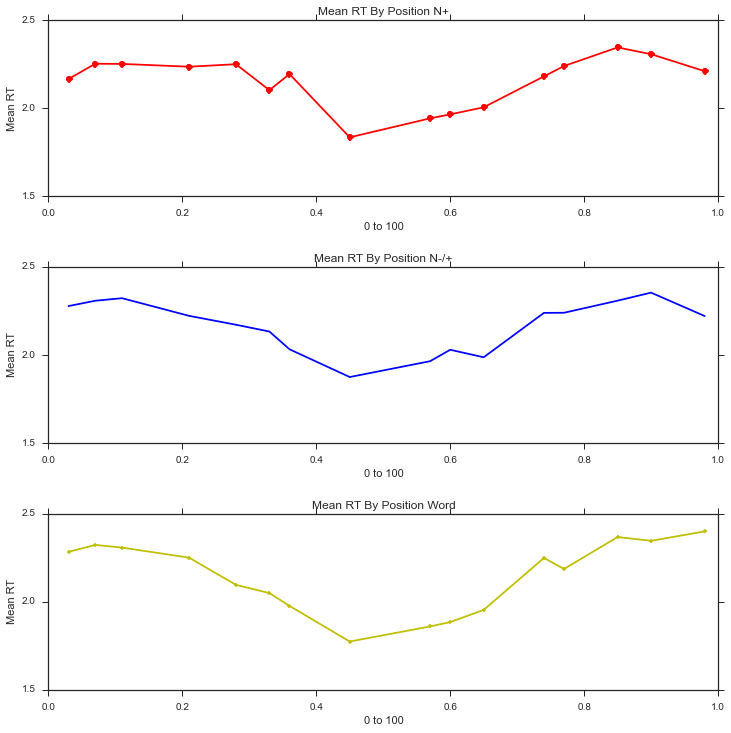

In [437]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'ro-')
plt.title('Mean RT By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, 'b+-')
plt.title('Mean RT By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, 'y.-')
plt.title('Mean RT By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

## PAE by position (averages across subjects)

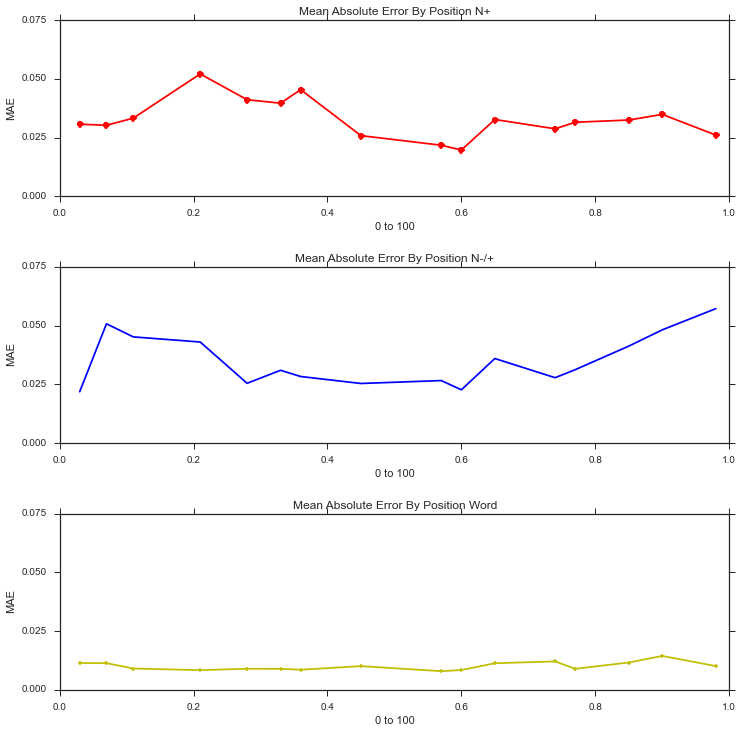

In [438]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'ro-')
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, 'b+-')
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, 'y.-')
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

plt.subplots_adjust(hspace=.4)

###Signed error is calculated as Response - Correct

In [439]:
signerror = position_tasks['Error'].mean()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()

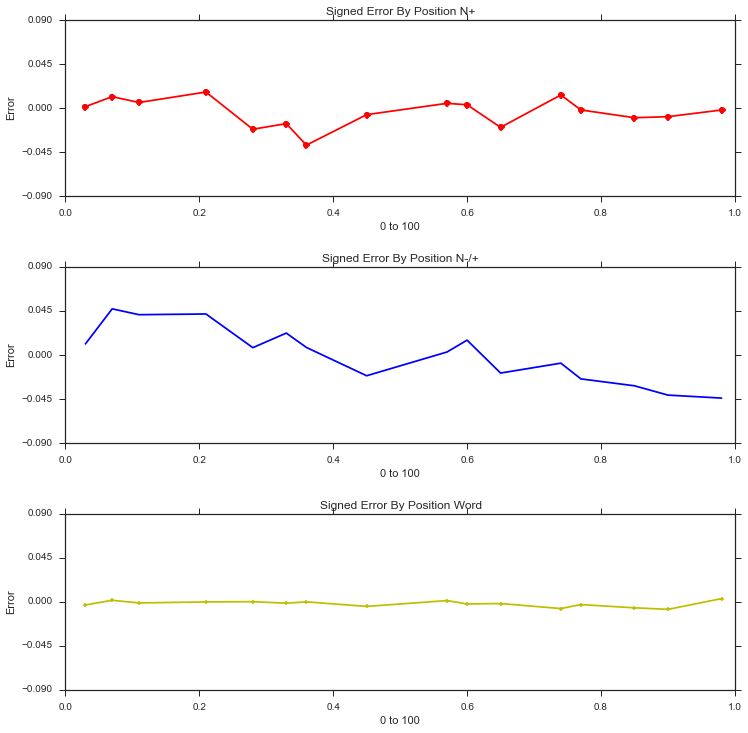

In [440]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'ro-')
plt.title('Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, 'b+-')
plt.title('Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, 'y.-')
plt.title('Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

 Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

## SD calculated as SD of all data of a specific position

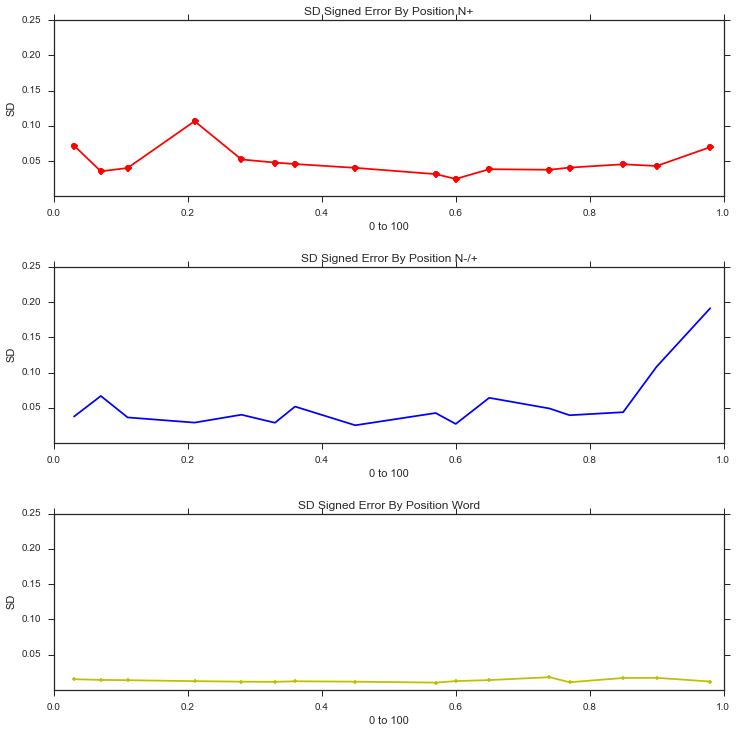

In [441]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

plt.subplots_adjust(hspace=.4)

In [442]:
#Basis to extract SD for each subject and then conduct average across subjects
#position_tasks.get_group((1,0.03)).loc['s_02009']['Error'].std()

In [443]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [444]:
for task in D:
    #print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

In [445]:
STDsignerror_1 = []
STDsignerror_2 = []
STDsignerror_3 = []
for stim in D[1]:
    STDsignerror_1.append(D[1][stim])
for stim in D[2]:
    STDsignerror_2.append(D[2][stim])
for stim in D[3]:
    STDsignerror_3.append(D[3][stim])

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

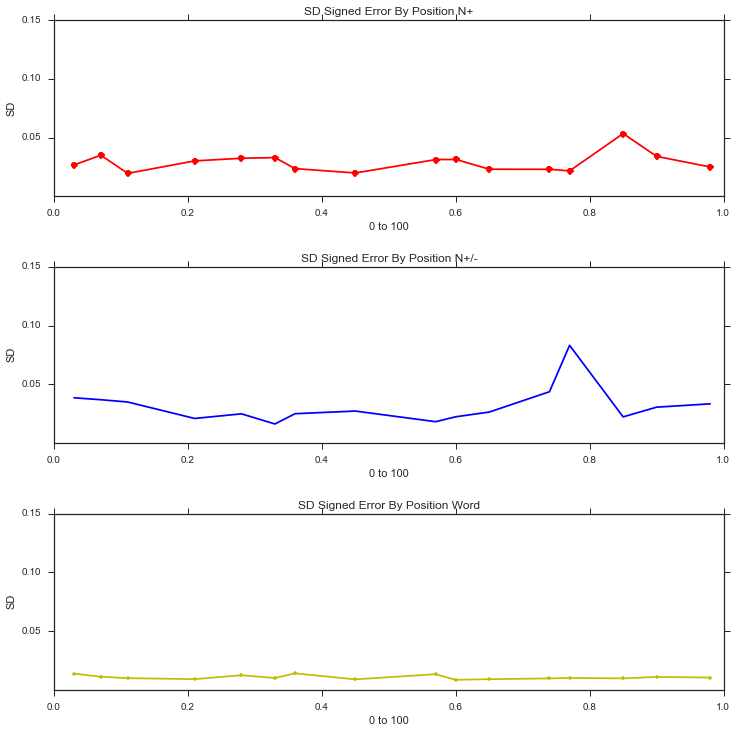

In [446]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

plt.subplots_adjust(hspace=.4)

In [447]:
#For mean error as well can be calculated this way
D2 = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D2.get(task,0) == 0:
            D2[task] = {}
        if D2[task].get(stim,0) == 0:
            D2[task][stim] = []
        D2[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())

##Correlate PAE Vs Landmark Distance

### Distance from 0

In [448]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

### Distance from 50

In [449]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

### Distance from 100

In [450]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

### Distance from Landmark

In [451]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

## PAE vs Landmark Distane (across subjects)

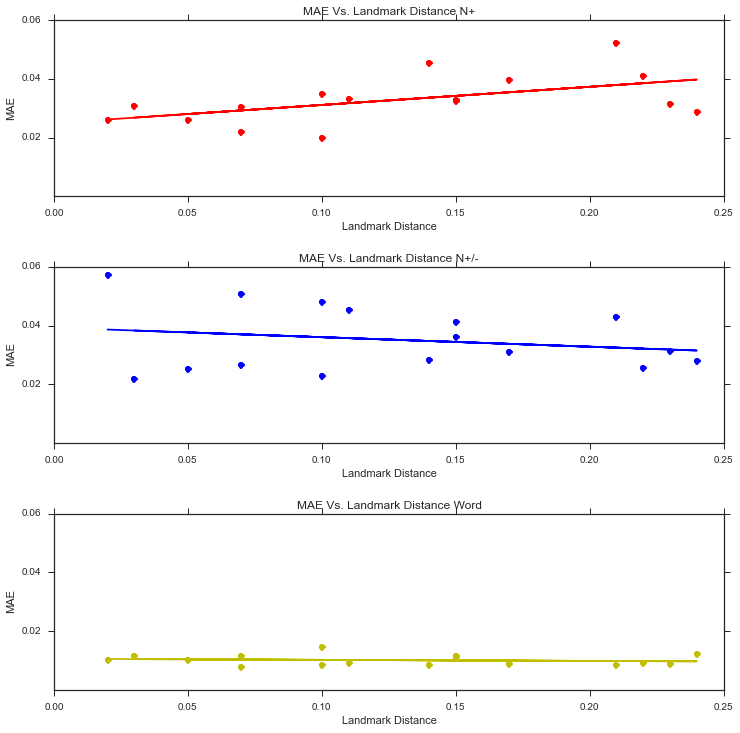

In [452]:
m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'ro')
plt.plot(dist_Land, m1*dist_Land + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'bo')
plt.plot(dist_Land, m2*dist_Land + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'yo')
plt.plot(dist_Land, m3*dist_Land + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [453]:
print m1, m2, m3

0.0618041320055 -0.0324222813047 -0.00362806718054


In [454]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

### r +,  r -,  r w

In [455]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.524771406064
r2 -0.210298450387
r3 -0.145689184758


### r^2 +,  r^2 -,  r^2 w

In [456]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.275385028623
r2sq 0.0442254382351
r3sq 0.0212253385554


In [457]:
#print 'slope1', slope1
#print 'slope2', slope2
#print 'slope3', slope3

In [458]:
#print 'p1', p1
#print 'p2', p2
#print 'p3', p3

##First half only

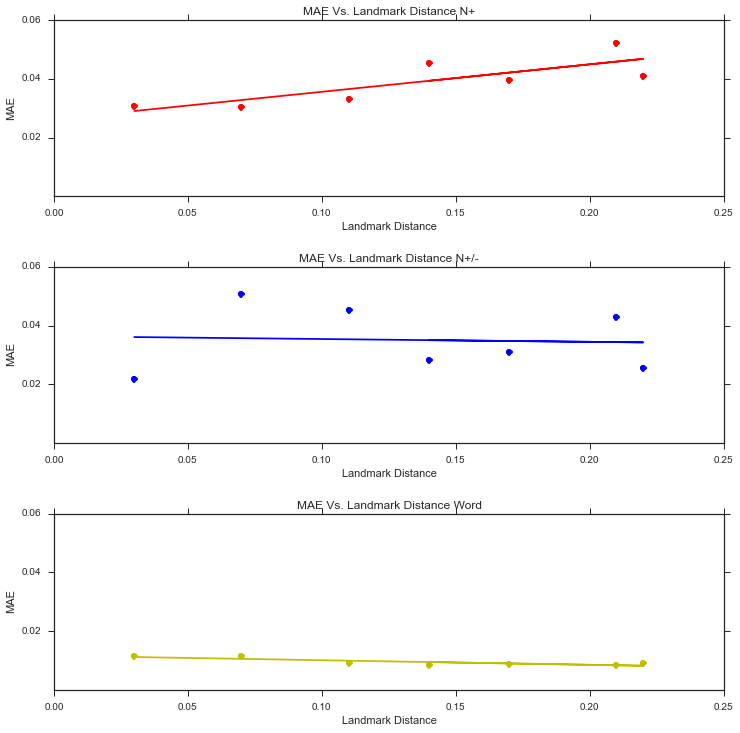

In [459]:
m1, b1 = np.polyfit(dist_Land[0:7],error_1[0:7],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[0:7], error_1[0:7], 'ro')
plt.plot(dist_Land[0:7], m1*dist_Land[0:7] + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[0:7],error_2[0:7],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[0:7], error_2[0:7], 'bo')
plt.plot(dist_Land[0:7], m2*dist_Land[0:7] + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[0:7],error_3[0:7],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[0:7], error_3[0:7], 'yo')
plt.plot(dist_Land[0:7], m3*dist_Land[0:7] + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

##Second half only

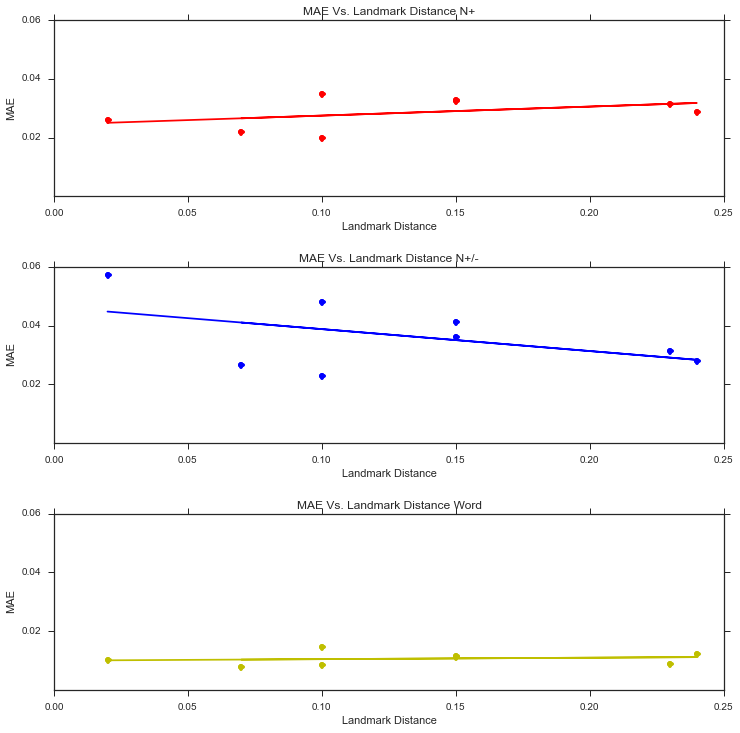

In [460]:
m1, b1 = np.polyfit(dist_Land[8:],error_1[8:],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[8:], error_1[8:], 'ro')
plt.plot(dist_Land[8:], m1*dist_Land[8:] + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[8:],error_2[8:],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[8:], error_2[8:], 'bo')
plt.plot(dist_Land[8:], m2*dist_Land[8:] + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[8:],error_3[8:],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[8:], error_3[8:], 'yo')
plt.plot(dist_Land[8:], m3*dist_Land[8:] + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Landmark distance Vs signed error

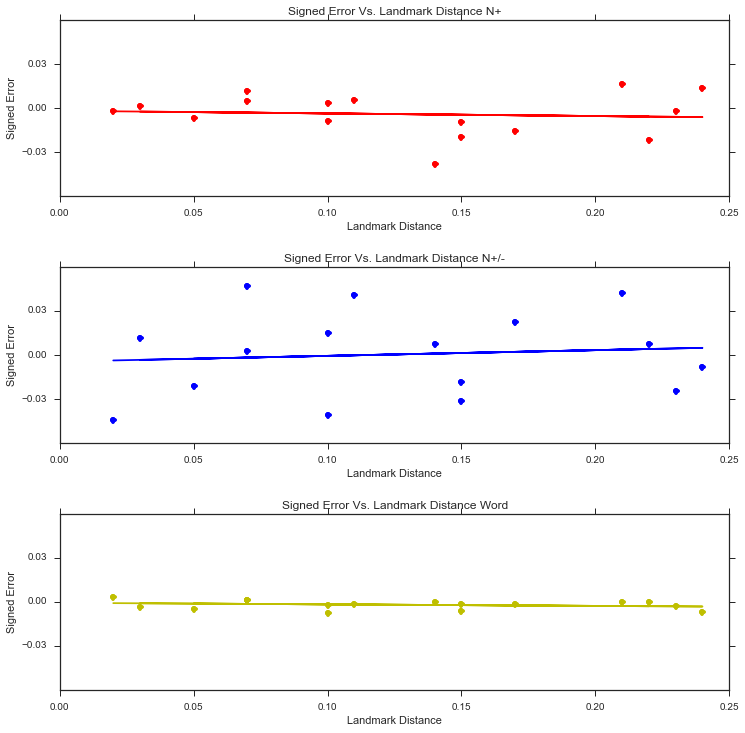

In [461]:
m1, b1 = np.polyfit(dist_Land,signerror_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, signerror_1, 'ro')
plt.plot(dist_Land, m1*dist_Land + b1, 'r-')
plt.title('Signed Error Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m2, b2 = np.polyfit(dist_Land,signerror_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, signerror_2, 'bo')
plt.plot(dist_Land, m2*dist_Land + b2, 'b-')
plt.title('Signed Error Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m3, b3 = np.polyfit(dist_Land,signerror_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, signerror_3, 'yo')
plt.plot(dist_Land, m3*dist_Land + b3, 'y-')
plt.title('Signed Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

plt.subplots_adjust(hspace=.4)

## Estimation slope vs SAT scores

In [462]:
nline_df.to_csv('nline_data.csv', sep='\t')

In [463]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [464]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [465]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [466]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [467]:
new_df['BigError'] = 0
new_df['BigError'].loc[new_df['AbsError']>0.15] = 1
new_df['BigError'].sum()

20

In [468]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [469]:
#group_task.groups

In [470]:
#group_task.get_group(('s_02003',1,0.98))['Error'].mean()

In [471]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [472]:
#error.loc['s_02003'].loc[1]

In [473]:
#response.loc['s_02003'].loc[1]

In [474]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()


In [475]:

error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)
        
        

In [476]:
slope1, intercept1, r1, p1, stderr1 = linregress(position_dict['s_02003'][3].index,
                                                 position_dict['s_02003'][3])

In [477]:
#plt.plot(position_dict['s_02003'][3].index, position_dict['s_02003'][3], 'bo')
#plt.plot(position_dict['s_02003'][3].index, slope1*position_dict['s_02003'][3].index + intercept1, '-o')
#plt.ylim([0,1])

In [478]:
#print slope1, intercept1, r1, r1*r1, p1, stderr1

In [479]:
#res_df

In [480]:
res_grp = res_df.groupby(['Subject','Task'])

In [481]:
#res_df['slope_P'][res_df['Task']==1].mean()

In [482]:
#res_df[['Subject','slope_P']][res_df['Task']==1]

In [483]:
#plt.plot(res_df['slope_P'][res_df['Task']==1], 'o')

In [484]:
#res_df['slope_P'][res_df['Task']==1].describe()

## Histogram slope subject estimates Task +

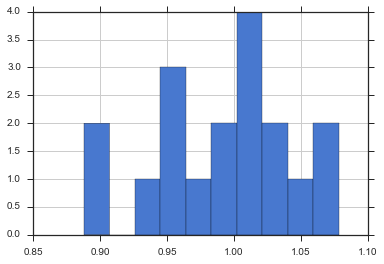

In [485]:
res_df['slope_P'][res_df['Task']==1].hist()

## Histogram slope subject estimates Task -

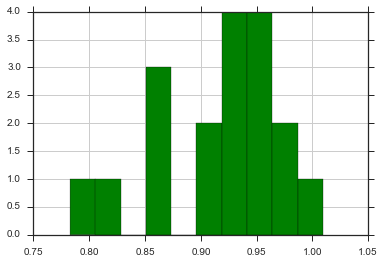

In [486]:
res_df['slope_P'][res_df['Task']==2].hist(color='g')

## Histogram slope subject estimates Task w

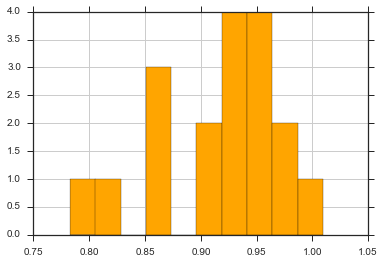

In [487]:
res_df['slope_P'][res_df['Task']==2].hist(color='orange')

In [488]:
math = pd.read_csv('Math_Results.csv')

In [489]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

In [490]:
#res_df[['Subject','slope_P', 'Math_Score']][res_df['Task']==1]

In [491]:
#slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_E'][res_df['Task']==1]),
#                                                 res_df['Math_Score'][res_df['Task']==1])
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]),res_df['Math_Score'][res_df['Task']==1], 'o')
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]), slope1*abs(res_df['slope_E'][res_df['Task']==1]) + intercept1, 'b-')

In [492]:
#print r1, r1*r1, p

##  Deviation from Linearity Vs. Math Score

([<matplotlib.axis.YTick at 0x10d623190>,
 <a list of 4 Text yticklabel objects>)

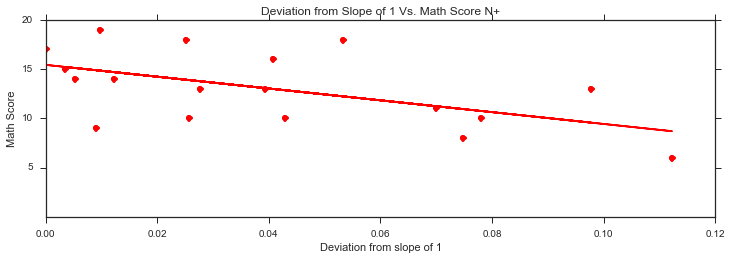

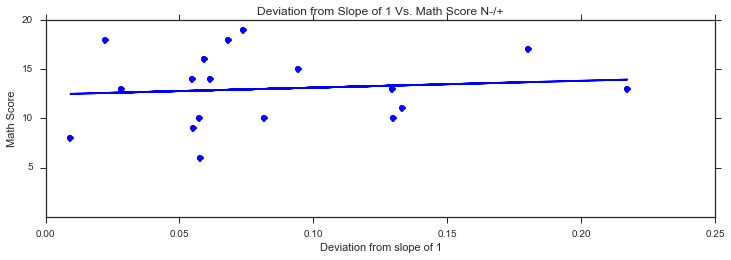

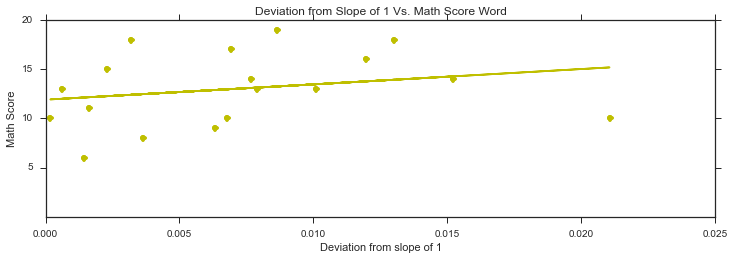

In [493]:
m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'ro')
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, 'r-')
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'bo')
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, 'b-')
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3] -1),
                    res_df['Math_Score'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'yo')
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, 'y-')
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [494]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [495]:
print r1, r2, r3

-0.544994387157 0.101716770176 0.23332680009


### R^2 +, R^2 -, R^2 w

In [496]:
print r1*r1, r2*r2, r3*r3

0.297018882033 0.010346301335 0.0544413956404


### Slope +, Slope -, Slope w

In [497]:
print slope1, slope2, slope3

-59.9976760937 6.96651954134 155.642765904


### p-value +, p-value -, p-value w

In [498]:
print p1, p2, p3

0.0193391995445 0.687970493569 0.351437030905


##Scatter plots for individual subjects

In [499]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [500]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort('Math_Score', ascending=False)

In [501]:
table_order = ordered_math.Subject

In [502]:
#sns.set_palette('muted')
#sns.set_style('ticks')
#g = sns.FacetGrid(new_math_df[new_math_df['Task']==1], col='Subject', col_wrap=3, xlim=(0,1),
#                  ylim=(0,1), col_order=ordered_math['Subject'], size=4, aspect=1.2)
#g = g.map(sns.regplot, 'Line_pct', 'Response', scatter_kws={'s':80, 'marker':'+'})
#ctr = 0
#for ax in g.axes.flat:
#    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
#    ctr = ctr + 1

# Task N+

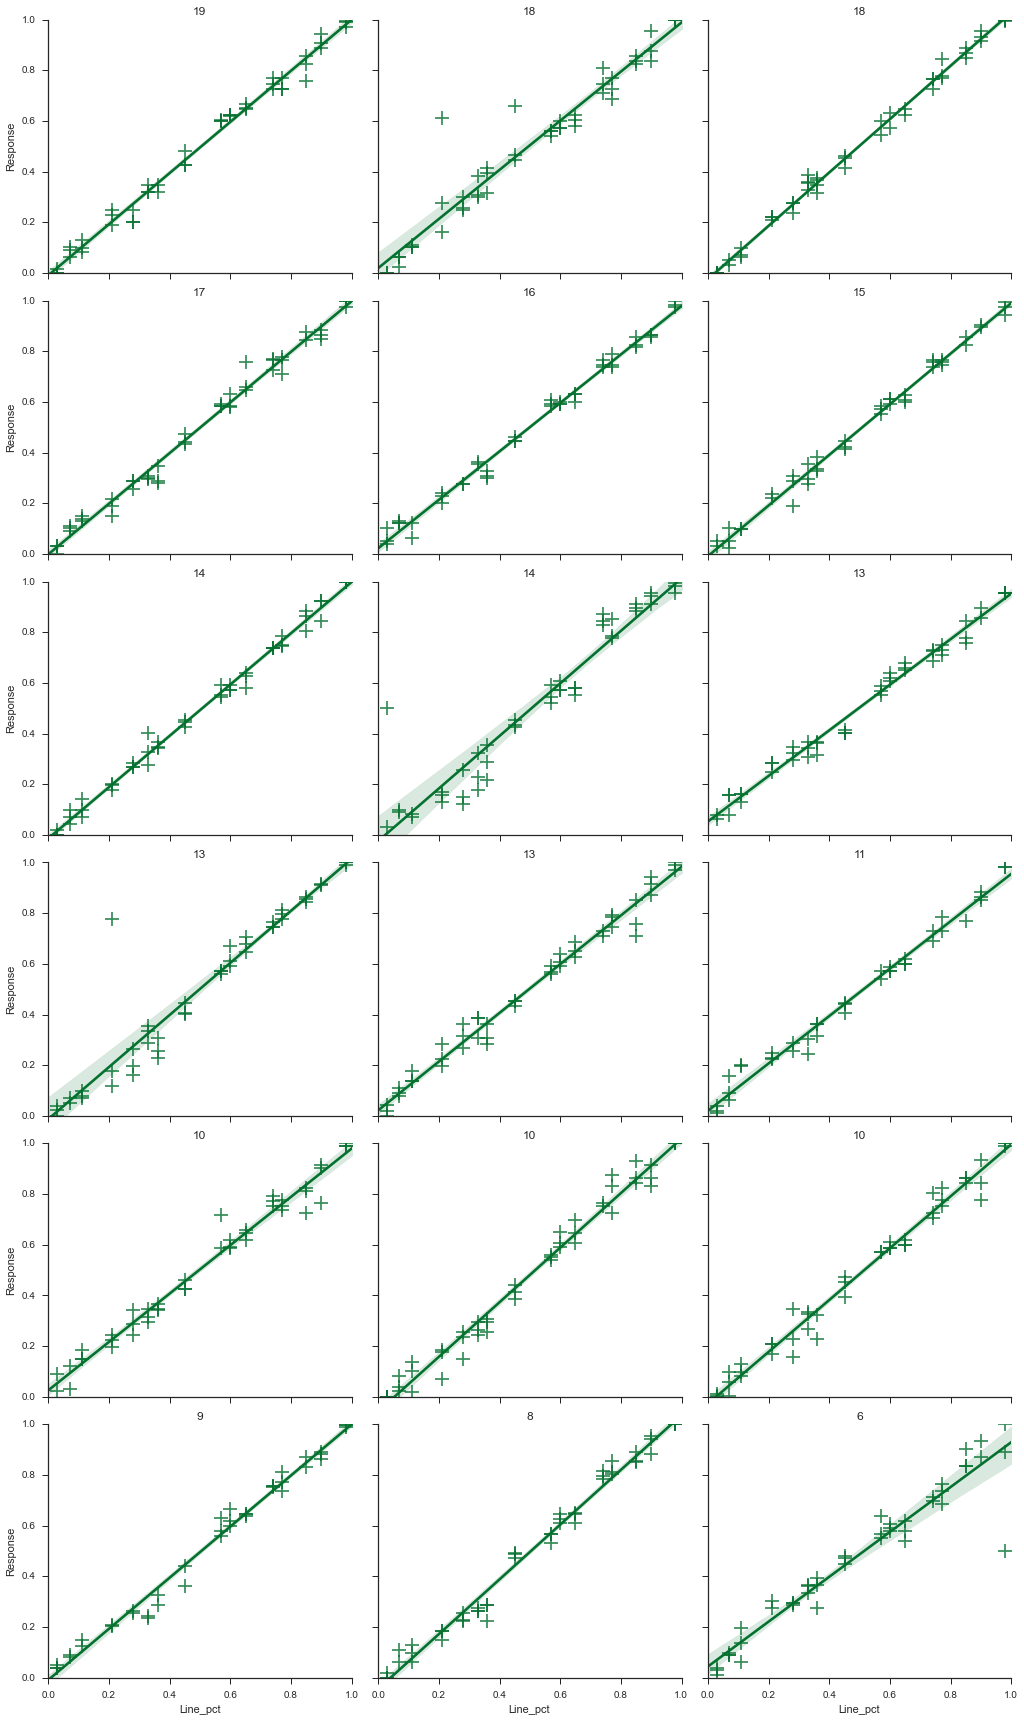

In [503]:
sns.set_palette('BuGn_r')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

# Task N-/+

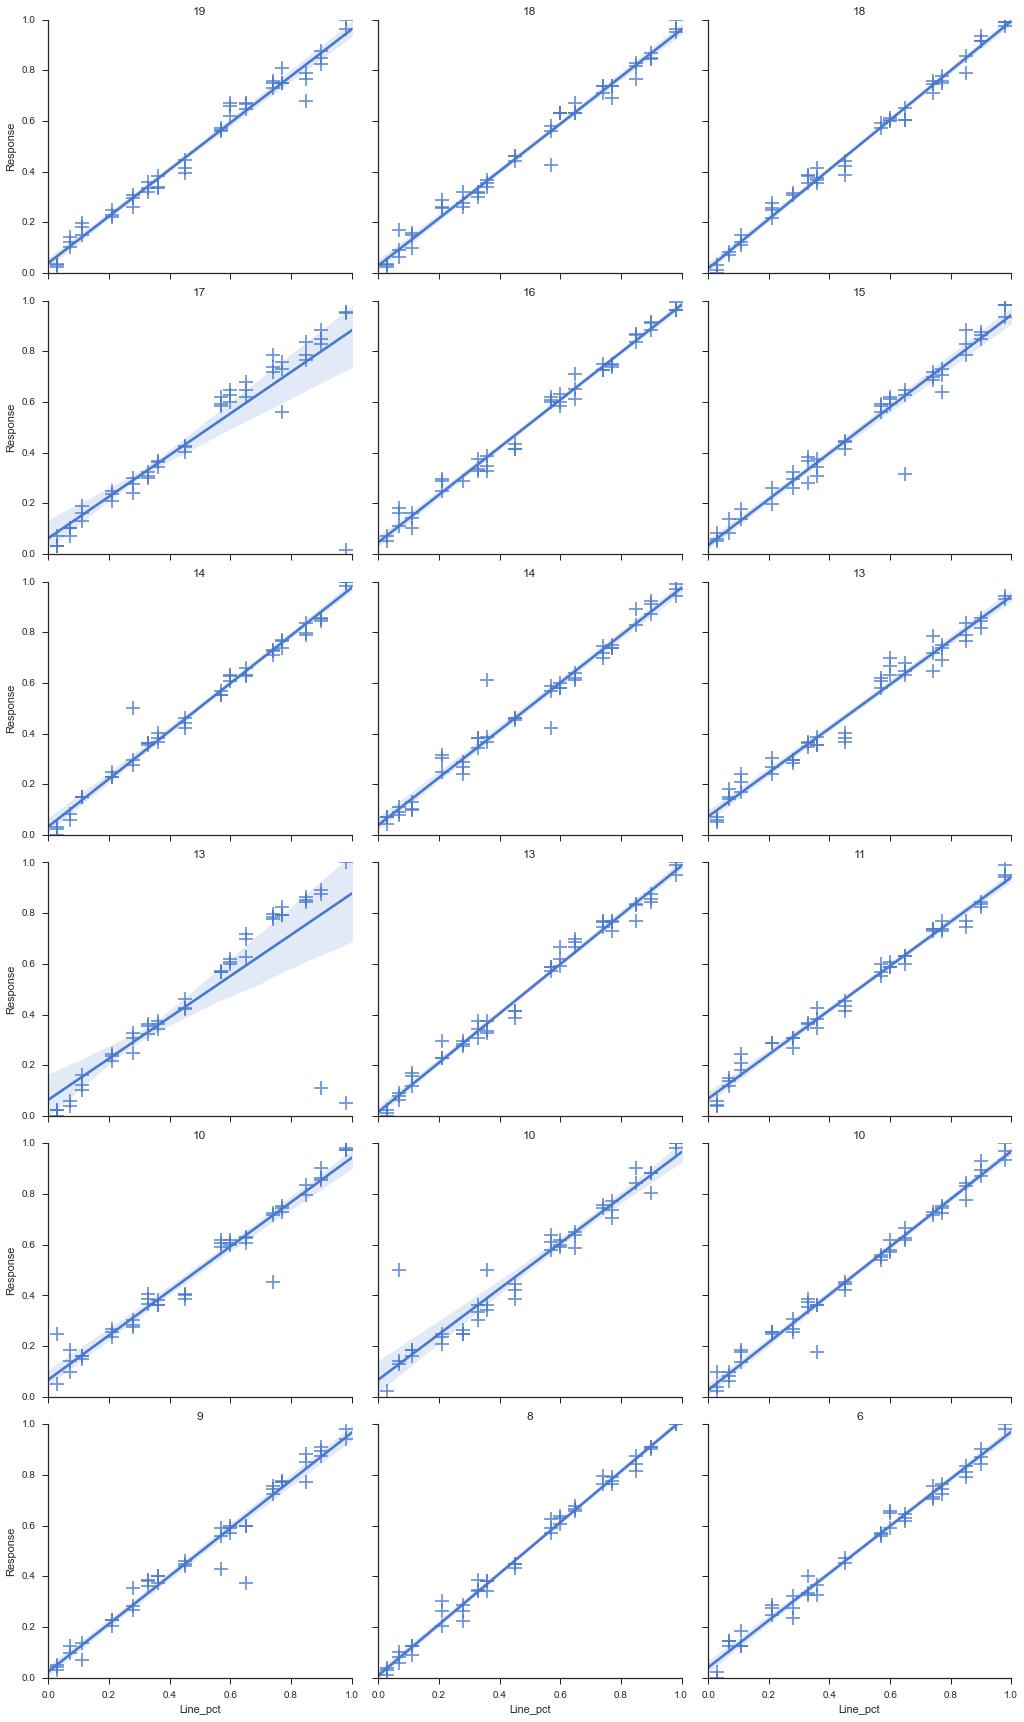

In [504]:
sns.set_palette('muted')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'c':'r'})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

## Make Result Table

In [505]:
group_task_t = new_df.groupby(['Subject', 'Task'])
#group_task_t['BigError'].sum()

In [583]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].mean())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].mean()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].mean()

In [584]:
results_df['E+'] = new_df[new_df['Task']==1].groupby('Subject')['BigError'].sum()
results_df['E-'] = new_df[new_df['Task']==2].groupby('Subject')['BigError'].sum()
results_df['Ew'] = new_df[new_df['Task']==3].groupby('Subject')['BigError'].sum()

In [585]:
sds = []
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':position_tasks.get_group((task,stim)).loc[sub]['Error'].std()})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

In [586]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [587]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [588]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [589]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [590]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].mean()

In [591]:
#PAE1.loc['s_02003'].iloc[0:8]

In [592]:
corrs1 = []
for sub in PAE1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE1.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE1.loc[sub].iloc[8:])
    corrs1.append({'Subject':sub, 'DE_l_+':r1, 'DE_r_+':r2})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [593]:
corrs2 = []
for sub in PAE2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE2.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE2.loc[sub].iloc[8:])
    corrs2.append({'Subject':sub, 'DE_l_-':r1, 'DE_r_-':r2})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [594]:
corrs3 = []
for sub in PAE3.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE3.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE3.loc[sub].iloc[8:])
    corrs3.append({'Subject':sub, 'DE_l_w':r1, 'DE_r_w':r2})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [595]:
miss_df = pd.read_csv('nline_data.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [596]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [597]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

In [598]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

In [599]:
results_df['AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].mean()
results_df['AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].mean()
results_df['AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].mean()

In [600]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [601]:
results_df = results_df.loc[table_order]
results_df

,SAT,Miss+,Miss-,Missw,RT+,RT-,RTw,E+,E-,Ew,...,DE_l_-,DE_r_-,DE_l_w,DE_r_w,AbsError+,AbsError-,AbsErrorw,linearity+,linearity-,linearityw
Subject,,,,,,,,,,,,,,,,,,,,,
s_02018,19,1,1,2,2.072041,2.033511,1.773908,0,1,0,...,-0.174555,0.016156,-0.472184,-0.176729,0.024857,0.032674,0.010622,0.009683,0.073592,0.008658
s_02006,18,1,0,1,1.980980,1.941609,1.988668,2,0,0,...,0.421934,-0.179989,-0.226583,-0.511185,0.040753,0.029739,0.009759,0.025142,0.067971,0.003173
s_02021,18,1,2,2,1.972313,2.097007,2.079233,0,0,0,...,0.598779,0.302879,0.596560,0.583205,0.023535,0.022469,0.009143,0.053314,0.022372,0.013026
s_02007,17,1,0,0,2.175133,2.187334,1.990379,0,2,0,...,-0.148679,-0.522360,-0.458205,-0.613694,0.025540,0.051028,0.006448,0.000100,0.180064,0.006938
s_02027,16,3,3,0,2.174201,2.158043,2.151927,0,0,0,...,-0.188001,-0.077590,-0.393434,0.035637,0.024535,0.029806,0.010316,0.040692,0.059048,0.011956
s_02020,15,5,3,4,2.381028,2.381369,2.359617,0,1,0,...,0.061058,0.517039,-0.344509,-0.328455,0.021955,0.039286,0.009633,0.003522,0.094216,0.002304
s_02009,14,0,1,0,2.206700,2.244773,2.270339,0,1,0,...,0.690187,-0.068899,0.088977,0.711919,0.021623,0.026929,0.010997,0.012346,0.054593,0.007654
s_02014,14,3,1,3,2.217741,2.174391,2.209245,3,1,0,...,0.408361,-0.097787,0.034968,0.189379,0.060156,0.032827,0.008793,0.005336,0.061277,0.015215
s_02011,13,2,1,4,2.166208,2.172371,2.193541,0,0,0,...,-0.379853,0.022921,-0.484255,0.617896,0.034305,0.047759,0.010208,0.097750,0.129183,0.000609


In [603]:
results_df.to_excel('Results Table.xlsx', index_label='Subject', merge_cells=False)

##  PAE Vs. Math Score

([<matplotlib.axis.YTick at 0x10f7788d0>,
 <a list of 4 Text yticklabel objects>)

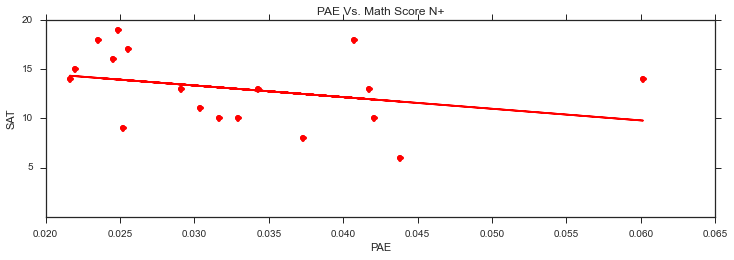

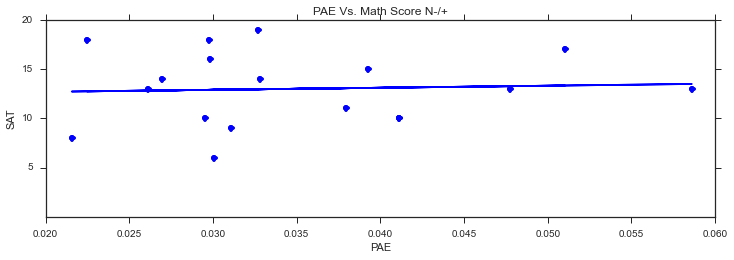

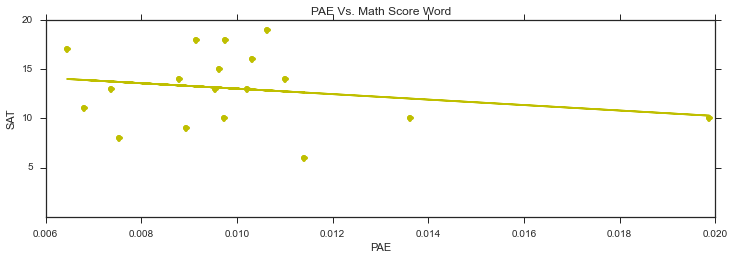

In [525]:
m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'ro')
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, 'r-')
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'bo')
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, 'b-')
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'yo')
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, 'y-')
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [526]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### Slope +, Slope -, Slope w

In [527]:
print slope1, slope2, slope3

-118.262549297 20.7144504451 -277.162324785


### r =, r -, r w

In [528]:
print r1, r2, r3

-0.31719678487 0.0552850232576 -0.22281674809


### R^2 +, R^2 -, R^2 w

In [529]:
print r1*r1, r2*r2, r3*r3

0.100613800332 0.00305643379659 0.0496473032295


### p-value +, p-value -, p-value w

In [530]:
print p1, p2, p3

0.199643111909 0.827521546604 0.374157541072


In [531]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

array([[ 1.        ,  0.22995345],
       [ 0.22995345,  1.        ]])

In [534]:
responses = position_tasks.Response.mean()

In [540]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

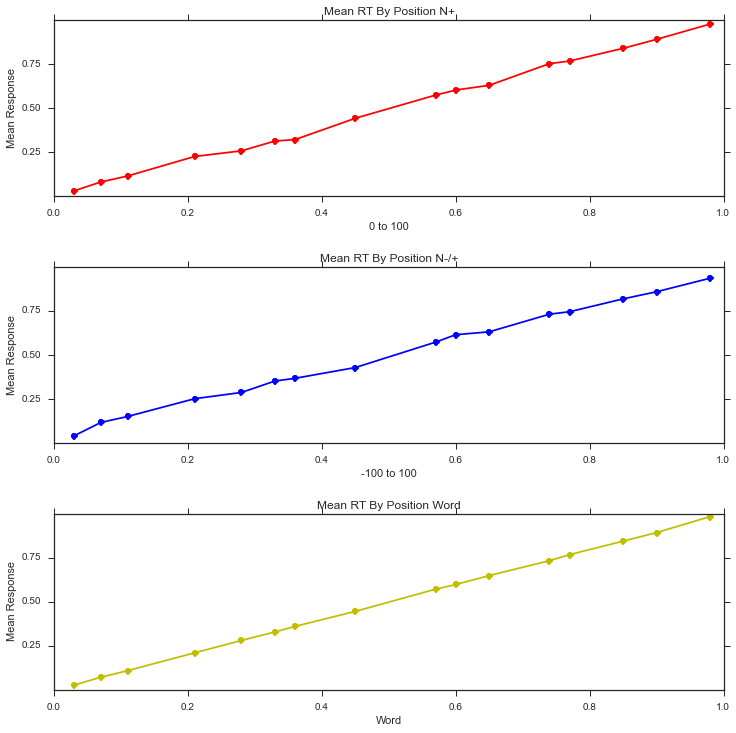

In [547]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'ro-')
plt.title('Mean RT By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'bo-')
plt.title('Mean RT By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'yo-')
plt.title('Mean RT By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

plt.subplots_adjust(hspace=.4)

In [553]:
nline_df.loc[('s_02022','Run_0',43)].MouseTrack

0.5